<a href="https://colab.research.google.com/github/abel-keya/machine_learning-_supervised_learning_with_python/blob/master/final2_Python_Programming_Ridge_Regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Ridge Regression

## 1.0 Example 

In [0]:
# Example 
# ---
# Regularization is the process of penalizing coefficients of variables either by removing them and or reducing their impact. 
# Ridge regression reduces the effect of problematic variables close to zero but never fully removes them. 
# ---
# Question: Build a regrssion model to predict expenses based on the variables available.
# ---
# Dataset source: Pydataset Library: VietNamI Dataset
# ---
#

In [0]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data 

In [0]:
# Data Preparation
# 

# Loading the data and convert the sex variable to a dummy variable
#
df = pd.DataFrame(data('VietNamI'))
df.loc[df.sex== 'male', 'sex'] = 0
df.loc[df.sex== 'female','sex'] = 1
df['sex'] = df['sex'].astype(int)
df

,pharvis,lnhhexp,age,sex,married,educ,illness,injury,illdays,actdays,insurance,commune
1,0,2.730363,3.761200,0,1,2,1,0,7,0,0,192
2,0,2.737248,2.944439,1,0,0,1,0,4,0,0,167
3,0,2.266935,2.564950,0,0,4,0,0,0,0,1,76
4,1,2.392753,3.637586,1,1,3,1,0,3,0,1,123
5,1,3.105335,3.295837,0,1,3,1,0,10,0,0,148
...,...,...,...,...,...,...,...,...,...,...,...,...
27762,0,1.847290,1.609438,1,0,5,2,0,3,0,0,115
27763,0,2.461460,2.833213,1,0,6,0,0,0,0,0,115
27764,0,2.460262,2.564950,1,0,5,0,0,0,0,0,116
27765,0,1.920169,4.007333,1,1,4,2,0,20,0,1,116


In [0]:
# Setting up our X and y datasets
#
X = df.drop(['lnhhexp'],axis=1)
y = df['lnhhexp']

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 0.355289 will be our indicator to determine if the regularized ridge regression model is superior or not.

0.3394804438827162


In [0]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#create our ridge model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was. 

0.38268683366142686

In [0]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.33948412000350886


In [0]:
# The 0.35 is lower than the 0.38. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data("VietNamI").columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'pharvis': 0.017341117525724585,
 'lnhhexp': 0.052867022185284405,
 'age': 0.008430875573905657,
 'sex': -0.07947479561175204,
 'married': 0.054330036921097086,
 'educ': -0.0584213278122396,
 'illness': 0.05142911022942518,
 'injury': -0.0031531480360276753,
 'illdays': -0.00852865576408862,
 'actdays': 0.10840121888636868,
 'insurance': -0.002392180317498778}

## 2.0 Challenges

### <font color="green">Challenge 1</font>

In [0]:
# Challenge 1 
# ---
# Question: Build an accurate model that can estimate the weight of fish given the following dataset.
# ---
# Dataset url = http://bit.ly/FishDataset
# ---
# 

In [0]:
data1=pd.read_csv('http://bit.ly/FishDataset')
data1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
data1.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [0]:
# Setting up our X and y datasets
#
X_1 = data1[['Length1','Length2','Length3','Height','Width']]
y_1 = data1['Weight']

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X_1,y_1)
first_model = (mean_squared_error(y_true=y_1,y_pred=regression.predict(X_1)))
print(first_model)

# The output  value of 0.355289 will be our indicator to determine if the regularized ridge regression model is superior or not.

14607.878944541946


In [0]:
#create our ridge model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_1,y_1)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

22554.15812835312

In [0]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_1,y_1)
second_model = (mean_squared_error(y_true=y_1,y_pred=ridge.predict(X_1)))
print(second_model)

15027.22807199908


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are not the same. This means that the penalization has worked well with this dataset.

{'Species': 62.35521443246437,
 'Weight': -6.526752492044203,
 'Length1': -29.026218612693423,
 'Length2': 28.297351322276626,
 'Length3': 22.473306652237348}

### <font color="green">Challenge 2</font>

In [0]:
# Challenge 2
# ---
# Question: Build a regression algorithm for predicting unemployment within an economy.
# ---
# Dataset url = http://bit.ly/EconomicDataset
# ---
# Dataset Info
# 1. date. Month of data collection
# 2. psavert, personal savings rate
# 3. pce, personal consumption expenditures, in billions of dollars
# 4. unemploy, number of unemployed in thousands 
# 5. empmed, median duration of unemployment, in week
# 6. pop, total population, in thousands
# ---
# 

In [0]:
data2=pd.read_csv('http://bit.ly/EconomicDataset')
data2.head()
data2=data2.drop('Unnamed: 0',axis=1)
data2=data2.drop('date',axis=1)
data2.head()

,pce,pop,psavert,uempmed,unemploy
0,507.8,198712,9.8,4.5,2944
1,510.9,198911,9.8,4.7,2945
2,516.7,199113,9.0,4.6,2958
3,513.3,199311,9.8,4.9,3143
4,518.5,199498,9.7,4.7,3066


In [0]:
X_2 = data2[['pce','pop','psavert','uempmed']]
y_2 = data2['unemploy']
X_2.shape,y_2.shape

((478, 4), (478,))

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
regression = LinearRegression()
regression.fit(X_2,y_2)
first_model = (mean_squared_error(y_true=y_2,y_pred=regression.predict(X_2)))
print(first_model)

# The output  value of 577136.8 will be the indicator to determine if the regularized ridge regression model is superior or not.

577136.8283554515


In [0]:
#create our ridge model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_2,y_2)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

905955.5586798877

In [0]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_2,y_2)
second_model = (mean_squared_error(y_true=y_2,y_pred=ridge.predict(X_2)))
print(second_model)

620402.7194311274


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data2.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are not the same. This means that the penalization has worked and made little difference with this dataset.

{'pce': -0.9284844017713159,
 'pop': 0.12448121827228788,
 'psavert': 392.2061680030785,
 'uempmed': 693.4293488330158}

### <font color="green">Challenge 3</font>

In [0]:
# Challenge 3
# ---
# Question: Build a regression model to predict the life expectancy of a country. 
# Apply ridge regression to your model.
# ---
# Dataset url = http://bit.ly/LifeExpectancyDataset
# ---
# Dataset Info:
# Country: Country
# Year: Year
# Status: Developed or Developing status
# Life expectancy: Life Expectancy in age
# Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
# infant deaths: Number of Infant Deaths per 1000 population
# Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
# percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
# Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
# Measles: Measles: number of reported cases per 1000 population
# BMI: Average Body Mass Index of entire population
# under-five: deaths Number of under-five deaths per 1000 population
# Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
# Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
# Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
# HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
# GDP: Gross Domestic Product per capita (in USD)
# Population: Population of the country
# thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
# thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
# Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
# Schooling: Number of years of Schooling(years)
# ---

In [0]:
data3=pd.read_csv('http://bit.ly/LifeExpectancyDataset')
data3

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [0]:
data3.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [0]:
data3.dtypes==object

Country                             True
Year                               False
Status                              True
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

In [0]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask =data3.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = data3.columns[categorical_feature_mask].tolist()
categorical_features

['Country', 'Status']

In [0]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(2):
    new = le.fit_transform(data3[categorical_features[i]])
    data3[categorical_features[i]] = new
data3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
data3.dtypes

Country                              int32
Year                                 int64
Status                               int32
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [0]:
#data3=data3.drop(['Country','Year','Status'],axis=1)
data3.columns = data3.columns.str.strip().str.lower().str.replace(' ', '').str.replace('-', '').str.replace(')', '')
data3.head()

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,hepatitisb,measles,...,polio,totalexpenditure,diphtheria,hiv/aids,gdp,population,thinness119years,thinness59years,incomecompositionofresources,schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
data3.isna().sum()

country                           0
year                              0
status                            0
lifeexpectancy                   10
adultmortality                   10
infantdeaths                      0
alcohol                         194
percentageexpenditure             0
hepatitisb                      553
measles                           0
bmi                              34
underfivedeaths                   0
polio                            19
totalexpenditure                226
diphtheria                       19
hiv/aids                          0
gdp                             448
population                      652
thinness119years                 34
thinness59years                  34
incomecompositionofresources    167
schooling                       163
dtype: int64

In [0]:
#data3.fillna(data3.mean, inplace=True)
data3.dropna(inplace=True)
data3.isna().sum()

country                         0
year                            0
status                          0
lifeexpectancy                  0
adultmortality                  0
infantdeaths                    0
alcohol                         0
percentageexpenditure           0
hepatitisb                      0
measles                         0
bmi                             0
underfivedeaths                 0
polio                           0
totalexpenditure                0
diphtheria                      0
hiv/aids                        0
gdp                             0
population                      0
thinness119years                0
thinness59years                 0
incomecompositionofresources    0
schooling                       0
dtype: int64

In [0]:
data3.dtypes

country                           int32
year                              int64
status                            int32
lifeexpectancy                  float64
adultmortality                  float64
infantdeaths                      int64
alcohol                         float64
percentageexpenditure           float64
hepatitisb                      float64
measles                           int64
bmi                             float64
underfivedeaths                   int64
polio                           float64
totalexpenditure                float64
diphtheria                      float64
hiv/aids                        float64
gdp                             float64
population                      float64
thinness119years                float64
thinness59years                 float64
incomecompositionofresources    float64
schooling                       float64
dtype: object

In [0]:
X_3 = data3[['adultmortality','infantdeaths','alcohol','percentageexpenditure','hepatitisb','measles','bmi','underfivedeaths','polio','totalexpenditure','diphtheria','hiv/aids','gdp','population','thinness119years','thinness59years','incomecompositionofresources','schooling']].values
y_3 = data3['lifeexpectancy'].values
X_3.shape,y_3.shape

((1649, 18), (1649,))

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
regression = LinearRegression()
regression.fit(X_3,y_3)

LinearRegression()

In [0]:
first_model = (mean_squared_error(y_true=y_3,y_pred=regression.predict(X_3)))
print(first_model)
print(regression.coef_)
# The output  value of 12.78 will be the indicator to determine if the regularized ridge regression model is superior or not.

12.78095086391869
[-1.68885302e-02  9.36938378e-02 -5.43483450e-02  3.77682623e-04
 -5.58249970e-03 -8.61733822e-06  3.34980599e-02 -7.04701961e-02
  7.83637889e-03  7.97522211e-02  1.43889187e-02 -4.38298048e-01
  1.38327405e-05 -6.91652430e-10 -8.67022868e-03 -5.12278224e-02
  9.82414672e+00  8.78334955e-01]


In [0]:
#create our ridge model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

0.38268683366142686

In [0]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.33948412000350886


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are not  the same. This means that the penalization made little difference with this dataset.

{'country': -0.016888530199988098,
 'year': 0.09369383783976233,
 'status': -0.05434834504901625,
 'lifeexpectancy': 0.00037768262346107753,
 'adultmortality': -0.005582499704521906,
 'infantdeaths': -8.617338219852501e-06,
 'alcohol': 0.033498059904270766,
 'percentageexpenditure': -0.07047019611757346,
 'hepatitisb': 0.0078363788925499,
 'measles': 0.07975222107687979,
 'bmi': 0.014388918694334464,
 'underfivedeaths': -0.4382980476485813,
 'polio': 1.3832740537998245e-05,
 'totalexpenditure': -6.916524297739812e-10,
 'diphtheria': -0.008670228683911695,
 'hiv/aids': -0.05122782238759229,
 'gdp': 9.824146723453667,
 'population': 0.8783349550519235}

### <font color="green">Challenge 4</font>

In [0]:
# Challenge 4
# ---
# Question: Given the beauty dataset below, create a regression model to predict wages upon applying ridge regression.
# ---
# Dataset url = http://bit.ly/BeautyDataset
# ---
# 

In [0]:
data4=pd.read_csv('http://bit.ly/BeautyDataset')
data4.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [0]:
X_4 = data4[['exper','union','goodhlth','black','female','married','service','educ','looks']]
y_4 = data4['wage']

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X_4,y_4)
first_model = (mean_squared_error(y_true=y_4,y_pred=regression.predict(X_4)))
print(first_model)

# The output  value of 17.31 will the  indicator to determine if the regularized ridge regression model is superior or not.

17.31382714976823


In [0]:
#create our ridge model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_4,y_4)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

18.100283101985156

In [0]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_4,y_4)
second_model = (mean_squared_error(y_true=y_4,y_pred=ridge.predict(X_4)))
print(second_model)

17.314236400105614


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data4.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'wage': 0.08253540875760201,
 'exper': 0.7587223921700658,
 'union': -0.023812862883344242,
 'goodhlth': 0.16655662665522333,
 'black': -2.1762813487235215,
 'female': 0.7017781130956602,
 'married': -0.5437696264946309,
 'service': 0.4835549023660606,
 'educ': 0.3941803220847889}

### <font color="green">Challenge 5</font>

In [0]:
# Challenge 5
# ---
# Create a regression model to predict sales prices. 
# Apply regularization techniques.
# ---
#Dataset source = http://bit.ly/HousePricesDataset
# ---

In [0]:
data5=pd.read_csv('train.csv')
data5.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
data5.shape

(1460, 81)

In [0]:
data5.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [0]:
#dropping the uneccessary columns with NaNs observations 100%
data5=data5.drop(['PoolQC','Fence','MiscFeature'],axis=1)
data5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [0]:
#data3=data3.drop(['Country','Year','Status'],axis=1)
data5.columns = data5.columns.str.strip().str.lower().str.replace(' ', '').str.replace('-', '').str.replace(')', '')
data5.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
#Mode imputation using values count
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
data5=data5.apply(lambda col:fillna(col))

In [0]:
#data
data5.isna().sum()

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
alley            0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       0
bsmtfintype2     0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr

In [0]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask =data5.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = data5.columns[categorical_feature_mask].tolist()
categorical_features

['mszoning',
 'street',
 'alley',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype',
 'salecondition']

In [0]:
#total number of columns in  categorical features
len(categorical_features)

40

In [0]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(40):
    new = le.fit_transform(data5[categorical_features[i]])
    data5[categorical_features[i]] = new
data5.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000


In [0]:
X = data5.drop(['saleprice'],axis=1)
y = data5['saleprice']
X.shape,y.shape

((1460, 77), (1460,))

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_mode5 = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_mode5)

# The output  value of 0.355289 will be our indicator to determine if the regularized ridge regression model is superior or not.

946848979.1817653


In [0]:
#create our ridge model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

1149602868.160877

In [0]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

947071292.9206866


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'id': -1.6793741490422898,
 'mssubclass': -127.01236836376815,
 'mszoning': -1702.6612867272786,
 'lotfrontage': -127.64595475122564,
 'lotarea': 0.3747009838020965,
 'street': 28397.32077329484,
 'alley': -4824.73236046242,
 'lotshape': -858.4360993795842,
 'landcontour': 3400.8836618414157,
 'utilities': -50202.651859034915,
 'lotconfig': 41.98585773633394,
 'landslope': 5989.804656145139,
 'neighborhood': 372.0677318602486,
 'condition1': -831.5944101867292,
 'condition2': -8399.622347366021,
 'bldgtype': -2153.194769589263,
 'housestyle': -1125.7882712924632,
 'overallqual': 11039.978102421464,
 'overallcond': 4743.9941578614835,
 'yearbuilt': 168.245253792114,
 'yearremodadd': 23.64698577203677,
 'roofstyle': 2402.9869144274835,
 'roofmatl': 4728.258245815673,
 'exterior1st': -921.128028519729,
 'exterior2nd': 286.26596719531574,
 'masvnrtype': 4386.342341029288,
 'masvnrarea': 31.132685617481542,
 'exterqual': -8837.152181018198,
 'extercond': 504.6876877214713,
 'foundation': 1

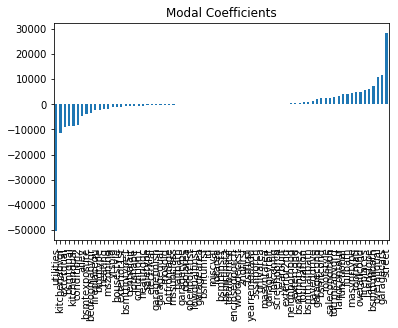

In [0]:
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

%matplotlib inline
#checking the magnitude of coefficients

predictors = X.columns

coef = Series(regression.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [0]:
data=pd.read_csv('http://bit.ly/LifeExpectancyDataset')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [0]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [0]:
data['Country'].nunique()

193

In [0]:
pd.get_dummies(data, columns=["Status"], prefix=["Status"],drop_first=True).head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
